In [78]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [79]:
no_points = 100
centres = [[-.5, .5], [.5, -.5]]
x, y = datasets.make_blobs(n_samples = no_points, centers = centres, cluster_std = 0.4)
#device = torch.device("cuda")
x_data = torch.Tensor(x)#.to('cuda')
y_data = torch.Tensor(y.reshape(100, 1))#.to('cuda')

def scatter_plot():
    plt.scatter(x[y==0, 0], x[y==0, 1])
    plt.scatter(x[y==1, 0], x[y==1, 1])

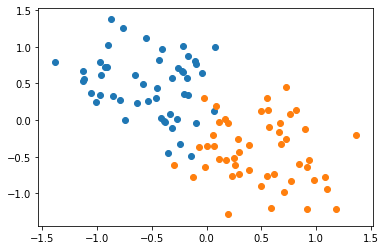

In [80]:
scatter_plot()

In [81]:
class Model(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        pred = torch.sigmoid(self.linear(x))
        return pred
    def predict(self, x):
        pred = self.forward(x)
        if pred >= .5:
            return 1
        else:
            return 0

In [82]:
torch.manual_seed(2)
model = Model(2, 1)
#model = model.to(device)
#print(list(model.parameters))

In [83]:
[w, b] = model.parameters()
w1, w2 = w.view(2)

def get_params():
    return (w1.item(), w2.item(), b[0].item())

In [84]:
def plot_fit(title):
    plt.title = title
    w1, w2, b1 = get_params()
    x1 = np.array([-2.0, 2.0])
    x2 = (w1*x1 + b1)/-w2  #line equation rearranged: 0= w1*x1 + w2*x2+b
    plt.plot(x1, x2, 'r')
    scatter_plot()

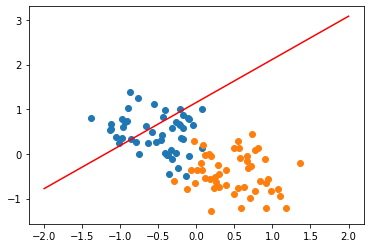

In [85]:
plot_fit('initial model')

In [86]:
criterion = nn.BCELoss() #compute error. Binary Cross Entropy computes loss when using two variables

optimiser = torch.optim.SGD(model.parameters(), lr = 0.01)#update parameters by stochastic grad descent

In [87]:
epochs = 1000 #no. passes thru dataset
losses = []

for i in range(epochs):
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data)
    print("epoch: ", i, " loss: ", loss.item())
    losses.append(loss.item())
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

4
epoch:419 loss:0.39659324288368225
epoch:420 loss:0.3962959051132202
epoch:421 loss:0.39599886536598206
epoch:422 loss:0.3957027792930603
epoch:423 loss:0.3954072892665863
epoch:424 loss:0.3951124846935272
epoch:425 loss:0.3948182165622711
epoch:426 loss:0.39452454447746277
epoch:427 loss:0.39423179626464844
epoch:428 loss:0.39393943548202515
epoch:429 loss:0.3936477601528168
epoch:430 loss:0.3933567702770233
epoch:431 loss:0.3930663764476776
epoch:432 loss:0.39277660846710205
epoch:433 loss:0.3924875557422638
epoch:434 loss:0.39219897985458374
epoch:435 loss:0.3919111490249634
epoch:436 loss:0.391623854637146
epoch:437 loss:0.3913373053073883
epoch:438 loss:0.39105138182640076
epoch:439 loss:0.390765905380249
epoch:440 loss:0.3904811143875122
epoch:441 loss:0.39019694924354553
epoch:442 loss:0.3899133801460266
epoch:443 loss:0.38963058590888977
epoch:444 loss:0.38934817910194397
epoch:445 loss:0.3890664279460907
epoch:446 loss:0.3887852430343628
epoch:447 loss:0.38850483298301697
ep

Text(0.5, 0, 'epoch')

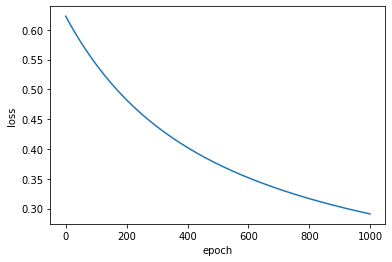

In [88]:
plt.plot(range(epochs), losses)
plt.ylabel('loss')
plt.xlabel('epoch')

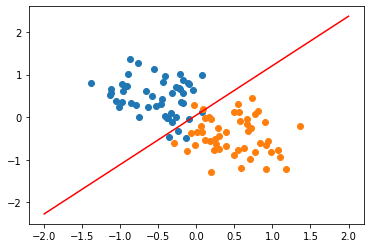

In [89]:
plot_fit('trained model')

red point +ve prob == 0.9441741704940796
black point +ve prob == 0.06271891295909882
red point in class == 1
black point +ve prob == 0


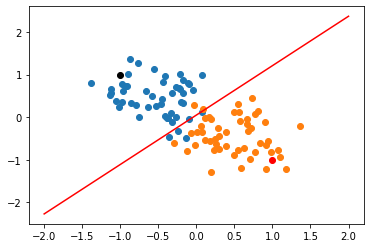

In [91]:
point1 = torch.Tensor([1., -1.])
point2 = torch.Tensor([-1., 1.])
plt.plot(point1.numpy()[0], point1.numpy()[1], "ro")
plt.plot(point2.numpy()[0], point2.numpy()[1], "ko")
print("red point +ve prob == {}".format(model.forward(point1).item()))
print("black point +ve prob == {}".format(model.forward(point2).item()))
print("red point in class == {}".format(model.predict(point1)))
print("black point +ve prob == {}".format(model.predict(point2)))
plot_fit('extra points')